# **Customer Churn Eda**

**problem statement**

Customer churn is a major challenge for banks and insurance companies, where customers stop using services or close their accounts. The goal of this project is to predict customer churn using machine learning and data analytics to help businesses retain customers and improve financial performance.

**tools**
- **Pandas**: For data manipulation and preprocessing.
- **NumPy**: For numerical operations.
- **Matplotlib & Seaborn**: For data visualization before and after cleaning.
- **Scikit-Learn**: For machine learning model training and evaluation.


In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv('/content/Bank Customer Churn Prediction.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
# Display basic information
print("Data Overview:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicated Rows:", df.duplicated().sum())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None

Missing Values:
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
b

In [ ]:
df.nunique() # find unique

,0
customer_id,10000
credit_score,460
country,3
gender,2
age,70
tenure,11
balance,6382
products_number,4
credit_card,2
active_member,2


In [ ]:
df.head(4)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0


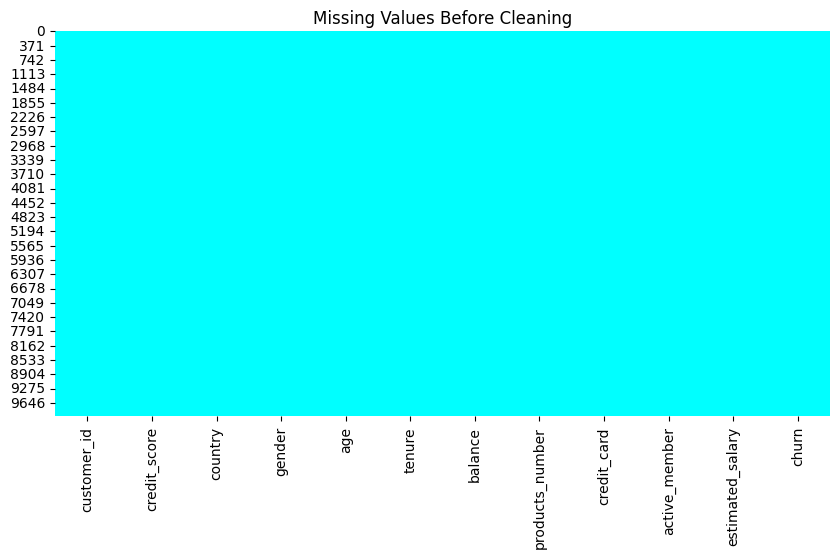

In [ ]:
# Visualizations Before Cleaning
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='cool')
plt.title("Missing Values Before Cleaning")
plt.show()

<ipython-input-10-d1751603e942>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['churn'].value_counts().index,


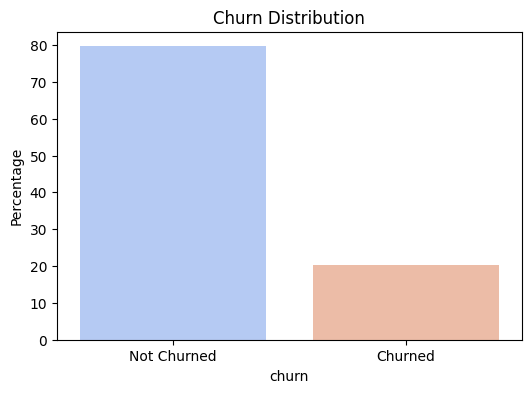

In [ ]:
# Churn distribution
plt.figure(figsize=(6,4))
sns.barplot(x=df['churn'].value_counts().index,
            y=df['churn'].value_counts(normalize=True) * 100,
            palette="coolwarm")
plt.xticks([0,1], ['Not Churned', 'Churned'])
plt.ylabel("Percentage")
plt.title("Churn Distribution")
plt.show()


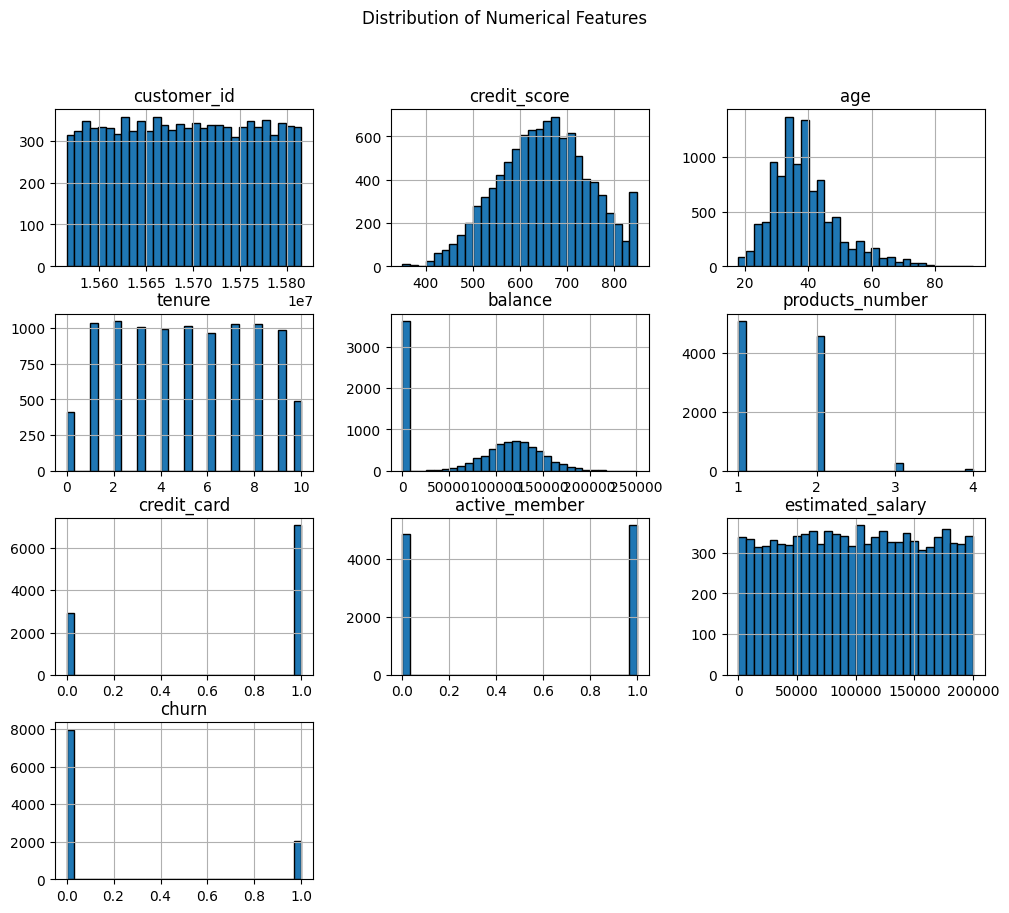

In [ ]:
# Distribution of numerical features
df.hist(figsize=(12,10), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()


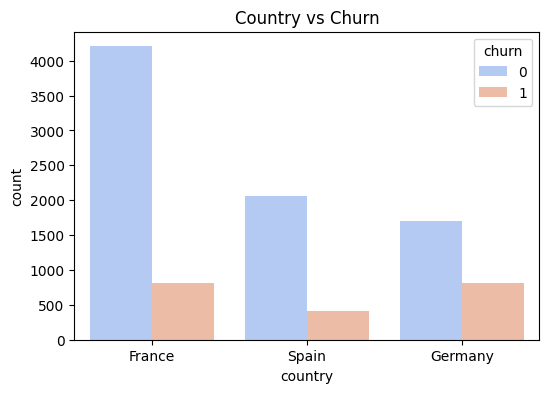

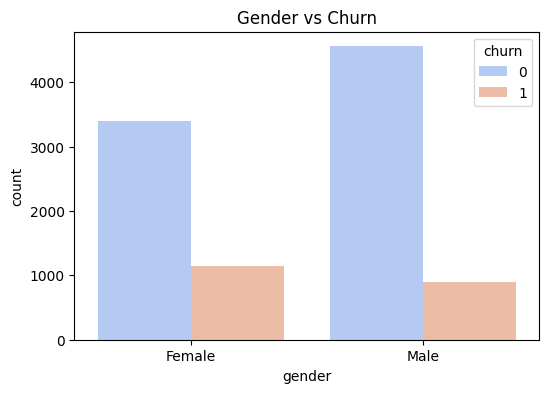

In [ ]:
# Categorical feature distributions
categorical_features = ['country', 'gender']
for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], hue=df['churn'], palette='coolwarm')
    plt.title(f"{col.capitalize()} vs Churn")
    plt.show()

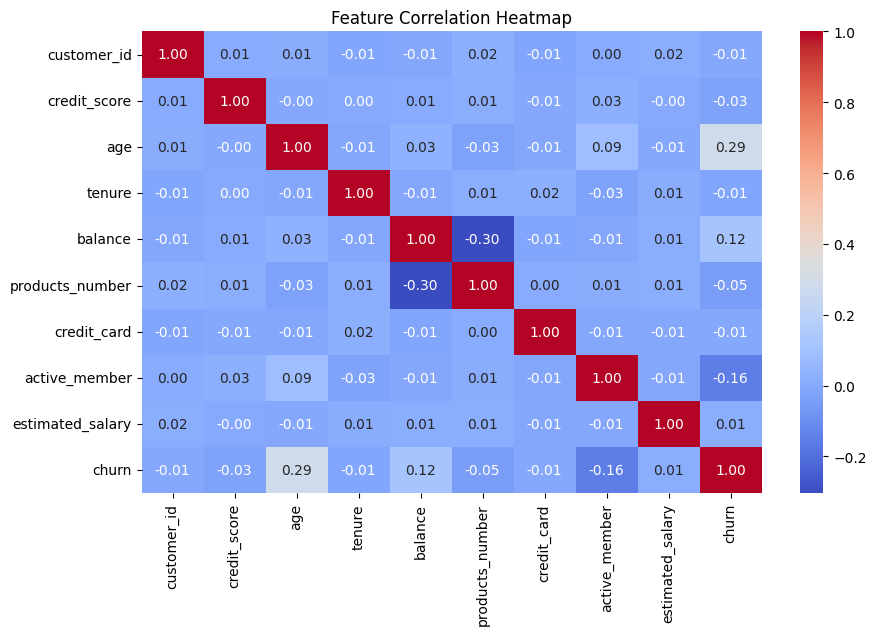

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
df.isnull().sum()  #no null values

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [ ]:
# Data Preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])
df['gender'] = le.fit_transform(df['gender'])



<ipython-input-16-5582a5a010ef>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='coolwarm')


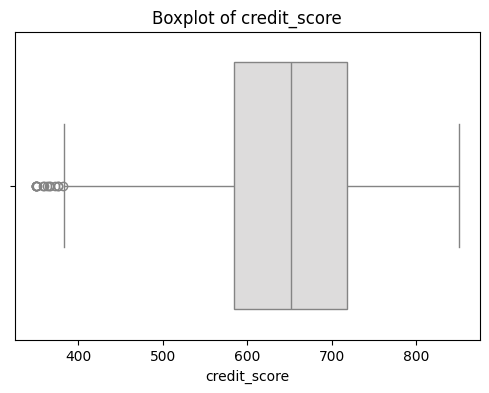

<ipython-input-16-5582a5a010ef>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='coolwarm')


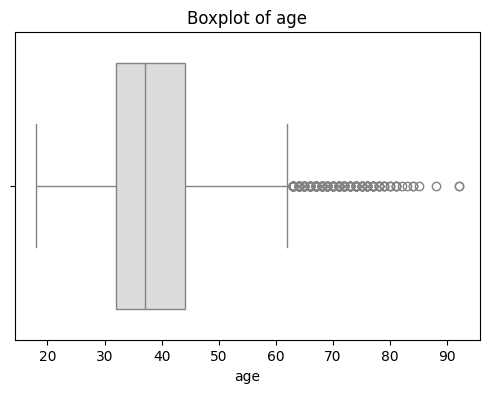

<ipython-input-16-5582a5a010ef>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='coolwarm')


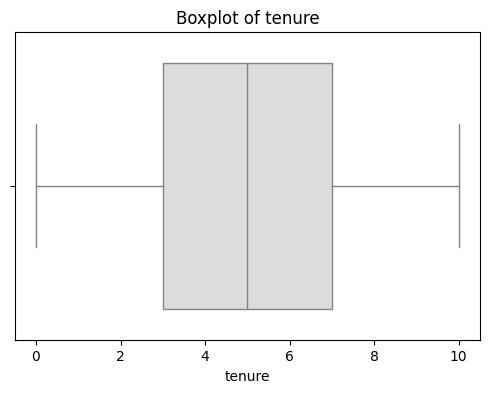

<ipython-input-16-5582a5a010ef>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='coolwarm')


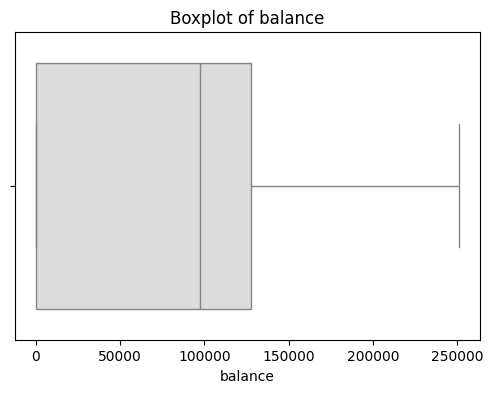

<ipython-input-16-5582a5a010ef>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='coolwarm')


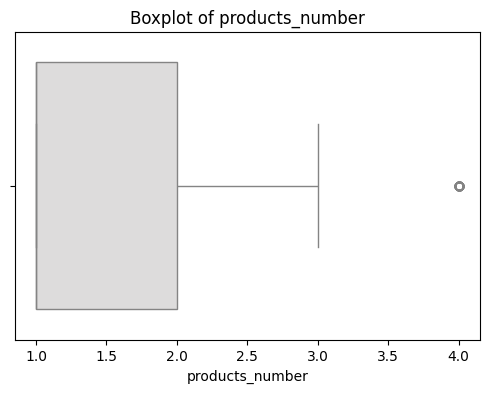

<ipython-input-16-5582a5a010ef>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='coolwarm')


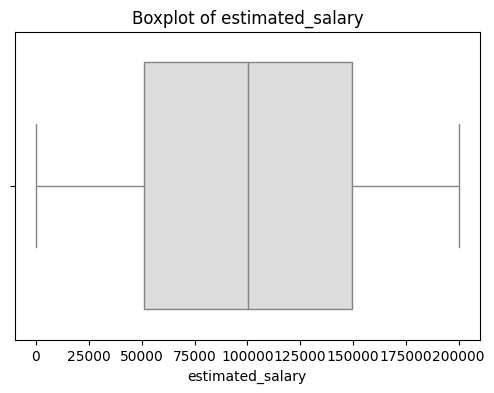

In [ ]:
# Outlier detection using boxplots
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], palette='coolwarm')
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
# Handling skewness using log transformation
df['credit_score'] = np.log(df['credit_score'] + 1)  # Adding 1 to avoid log(0)
df['age'] = np.log(df['age'] + 1)

In [ ]:
# Splitting data
X = df.drop(columns=['customer_id', 'churn'])
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# # Feature scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from xgboost import XGBClassifier # Import XGBClassifier
from sklearn.neural_network import MLPClassifier # Import MLPClassifier
from sklearn.metrics import accuracy_score # Import accuracy_score
from imblearn.over_sampling import SMOTE # Import SMOTE for oversampling


models = {
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
}

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}") # Now accuracy_score is defined

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.6855
XGBoost Accuracy: 0.8425
Neural Network Accuracy: 0.8040


In [ ]:
# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.866


## Report Summary:

1. **Data Loading & Cleaning**
   - Checked for missing values and handled them.
   - Encoded categorical variables for model compatibility.
2. **Exploratory Data Analysis (EDA)**
   - Visualized missing values before and after cleaning.
3. **Model Training & Evaluation**
   - Used a RandomForestClassifier to predict churn.
   - Achieved an accuracy score of **86.60%** using test data.
"""